In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from helperFxns import lett2num,alg2bin,filterAln,simMat

In [11]:
def read_fasta(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    seqs = []
    for line in lines:
        if line[0] != '>':
            seqs.append(line.strip())
    return seqs

def one_hot_tranform(seqs,lett2index=None,N_aa=21):
    #convert to numbers
    _num = lett2num(seqs,lett2index=lett2index)
    # convert to one-hot 
    ## dimension M * (N_aa * L)
    seqs_one_hot = alg2bin(_num,N_aa=N_aa).toarray()
    return seqs_one_hot

In [85]:
A_filtered_seqs  = read_fasta('A_filtered.fasta')
A_filtered_one_hot = one_hot_tranform(A_filtered_seqs)

In [114]:
A_filtered_one_hot_3d = A_filtered_one_hot.reshape(A_filtered_one_hot.shape[0],-1,21).transpose(0, 2, 1)
A_filtered_one_hot_3d.shape

(3104, 21, 161)

In [117]:
A_cov = np.tensordot(A_filtered_one_hot_3d.T, A_filtered_one_hot_3d, axes=([2],[0]))/A_filtered_one_hot_3d.shape[0]
A_cov.shape

(161, 21, 21, 161)

<Axes: >

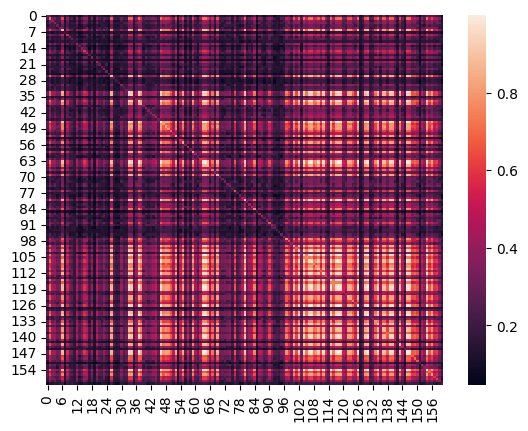

In [118]:
## collapse method
# max
A_cov_max = A_cov.max(axis=(1,2))
sns.heatmap(A_cov_max)

<Axes: >

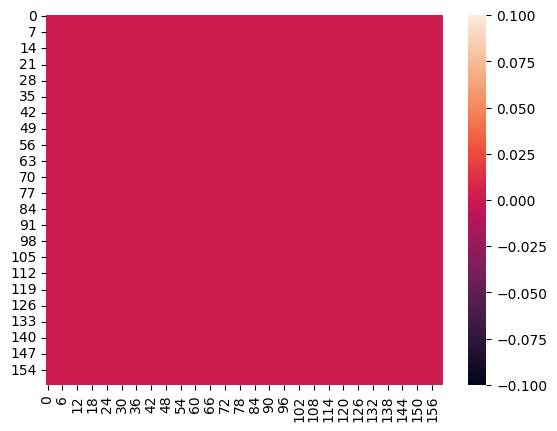

In [119]:
# min
A_cov_min = A_cov.min(axis=(1,2))
sns.heatmap(A_cov_min)

<Axes: >

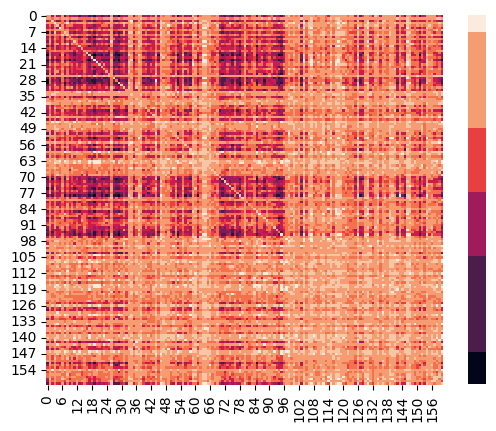

In [120]:
# mean
A_cov_mean = A_cov.mean(axis=(1,2))
sns.heatmap(A_cov_mean)

<Axes: >

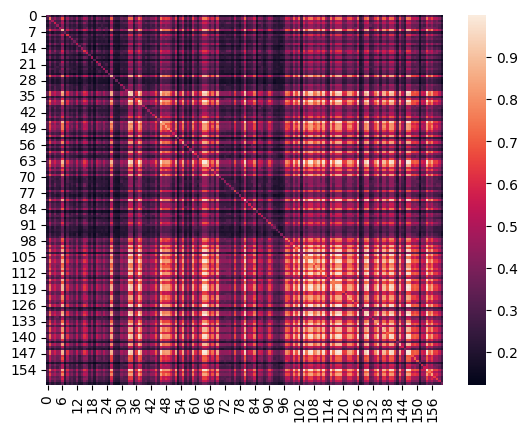

In [121]:
# L2 norm
A_cov_L2 = np.linalg.norm(A_cov, axis=(1,2))
sns.heatmap(A_cov_L2)

<Axes: >

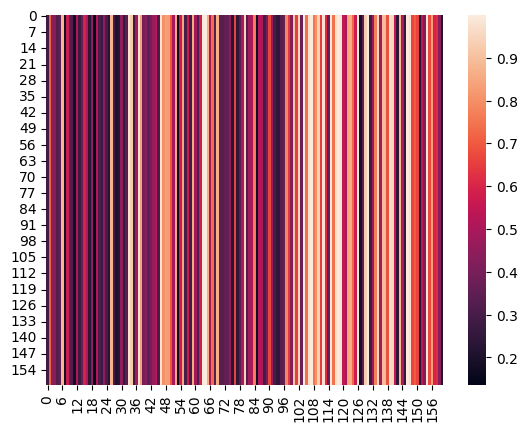

In [122]:
# L1 norm
A_cov_L1 = np.linalg.norm(A_cov, ord=1, axis=(1,2))
sns.heatmap(A_cov_L1)

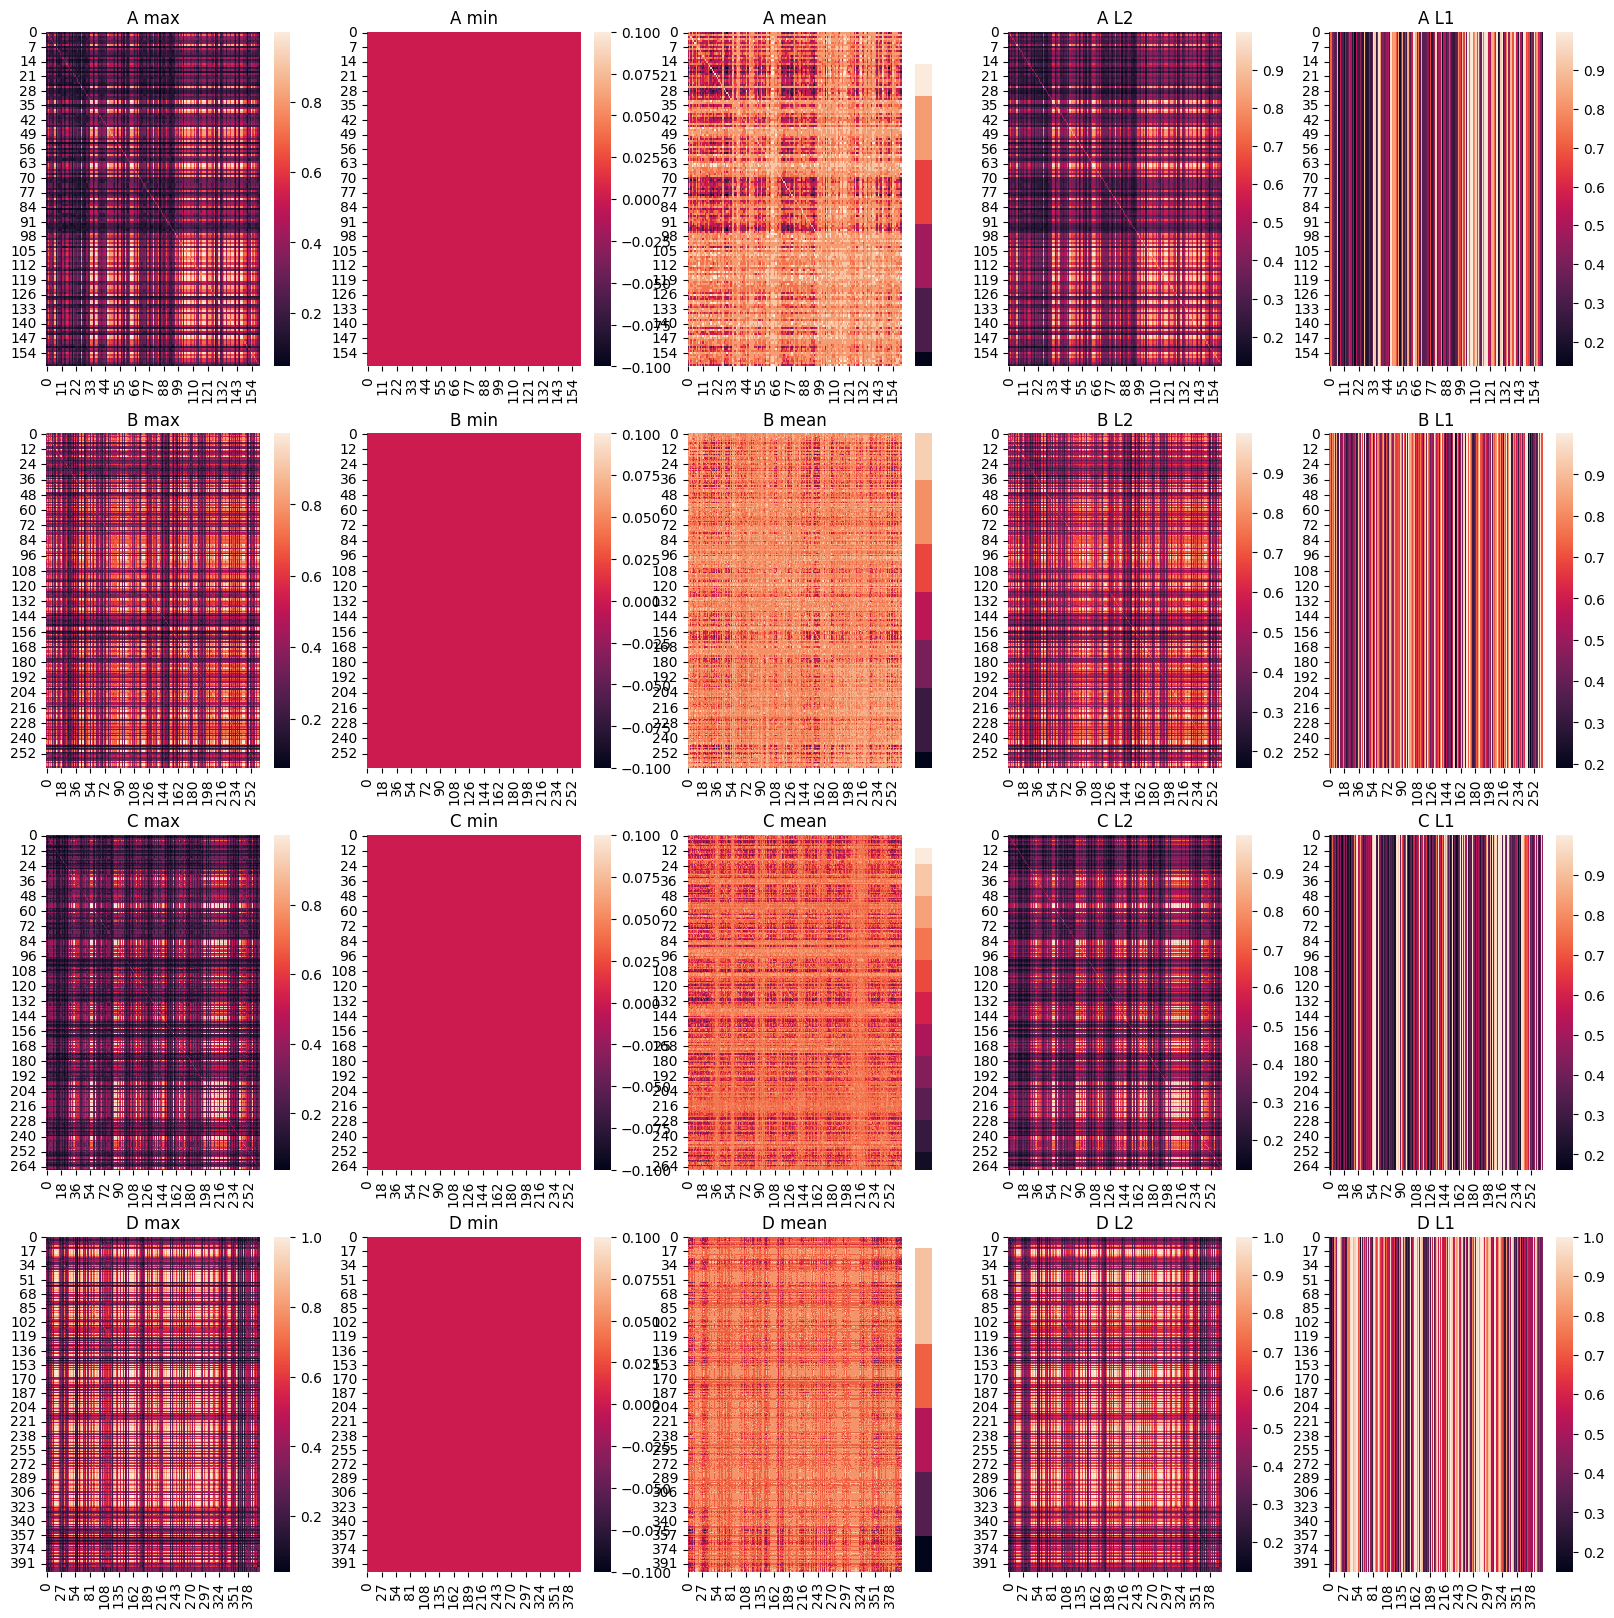

In [133]:
data_sets = ['A_filtered.fasta', 'B_filtered.fasta', 'C_filtered.fasta', 'D_filtered.fasta']
data_sets_name = ['A', 'B', 'C', 'D']
methods = ['max', 'min', 'mean', 'L2', 'L1']
fig,axes = plt.subplots(4,5, figsize=(20,20))

for (i,data_set), name in zip(enumerate(data_sets), data_sets_name):
    seqs  = read_fasta(data_set)
    one_hot = one_hot_tranform(seqs)
    one_hot_3d = one_hot.reshape(one_hot.shape[0],-1,21).transpose(0, 2, 1)
    cov = np.tensordot(one_hot_3d.T, one_hot_3d, axes=([2],[0]))/one_hot_3d.shape[0]
    
    for method, ax in zip(methods, axes[i].flatten()):
        if method == 'max':
            cov_max = cov.max(axis=(1,2))
            sns.heatmap(cov_max, ax=ax)
        elif method == 'min':
            cov_min = cov.min(axis=(1,2))
            sns.heatmap(cov_min, ax=ax)
        elif method == 'mean':
            cov_mean = cov.mean(axis=(1,2))
            sns.heatmap(cov_mean, ax=ax)
        elif method == 'L2':
            cov_L2 = np.linalg.norm(cov, axis=(1,2))
            sns.heatmap(cov_L2, ax=ax)
        elif method == 'L1':
            cov_L1 = np.linalg.norm(cov, ord=1, axis=(1,2))
            sns.heatmap(cov_L1, ax=ax)
        ax.set_title(f'{name} {method}')

In [4]:
## convert the specified amino type to physiochemical properties
## https://en.wikipedia.org/wiki/Amino_acid
## Polar: 1, Non-Polar: 2, Positively Charged: 3, Negatively Charged: 4, Blanks('-'): 5
lett2index = {'S': 1, 'T': 1, 'N': 1, 'Q': 1, 'C': 1, 'Y': 1,
                'A': 2, 'V': 2, 'L': 2, 'I': 2, 'M': 2, 'P': 2, 'F': 2, 'W': 2, 'G': 2,
                'K': 3, 'R': 3, 'H': 3,
                'D': 4, 'E': 4,
                '-': 5}

In [12]:
A_filtered_seqs  = read_fasta('A_filtered.fasta')
A_filtered_one_hot = one_hot_tranform(A_filtered_seqs,lett2index=lett2index,N_aa=5)

{'S': 1, 'T': 1, 'N': 1, 'Q': 1, 'C': 1, 'Y': 1, 'A': 2, 'V': 2, 'L': 2, 'I': 2, 'M': 2, 'P': 2, 'F': 2, 'W': 2, 'G': 2, 'K': 3, 'R': 3, 'H': 3, 'D': 4, 'E': 4, '-': 5}


In [15]:
A_filtered_one_hot_3d = A_filtered_one_hot.reshape(A_filtered_one_hot.shape[0],-1,5).transpose(0, 2, 1)

{'S': 1, 'T': 1, 'N': 1, 'Q': 1, 'C': 1, 'Y': 1, 'A': 2, 'V': 2, 'L': 2, 'I': 2, 'M': 2, 'P': 2, 'F': 2, 'W': 2, 'G': 2, 'K': 3, 'R': 3, 'H': 3, 'D': 4, 'E': 4, '-': 5}
{'S': 1, 'T': 1, 'N': 1, 'Q': 1, 'C': 1, 'Y': 1, 'A': 2, 'V': 2, 'L': 2, 'I': 2, 'M': 2, 'P': 2, 'F': 2, 'W': 2, 'G': 2, 'K': 3, 'R': 3, 'H': 3, 'D': 4, 'E': 4, '-': 5}
{'S': 1, 'T': 1, 'N': 1, 'Q': 1, 'C': 1, 'Y': 1, 'A': 2, 'V': 2, 'L': 2, 'I': 2, 'M': 2, 'P': 2, 'F': 2, 'W': 2, 'G': 2, 'K': 3, 'R': 3, 'H': 3, 'D': 4, 'E': 4, '-': 5}
{'S': 1, 'T': 1, 'N': 1, 'Q': 1, 'C': 1, 'Y': 1, 'A': 2, 'V': 2, 'L': 2, 'I': 2, 'M': 2, 'P': 2, 'F': 2, 'W': 2, 'G': 2, 'K': 3, 'R': 3, 'H': 3, 'D': 4, 'E': 4, '-': 5}


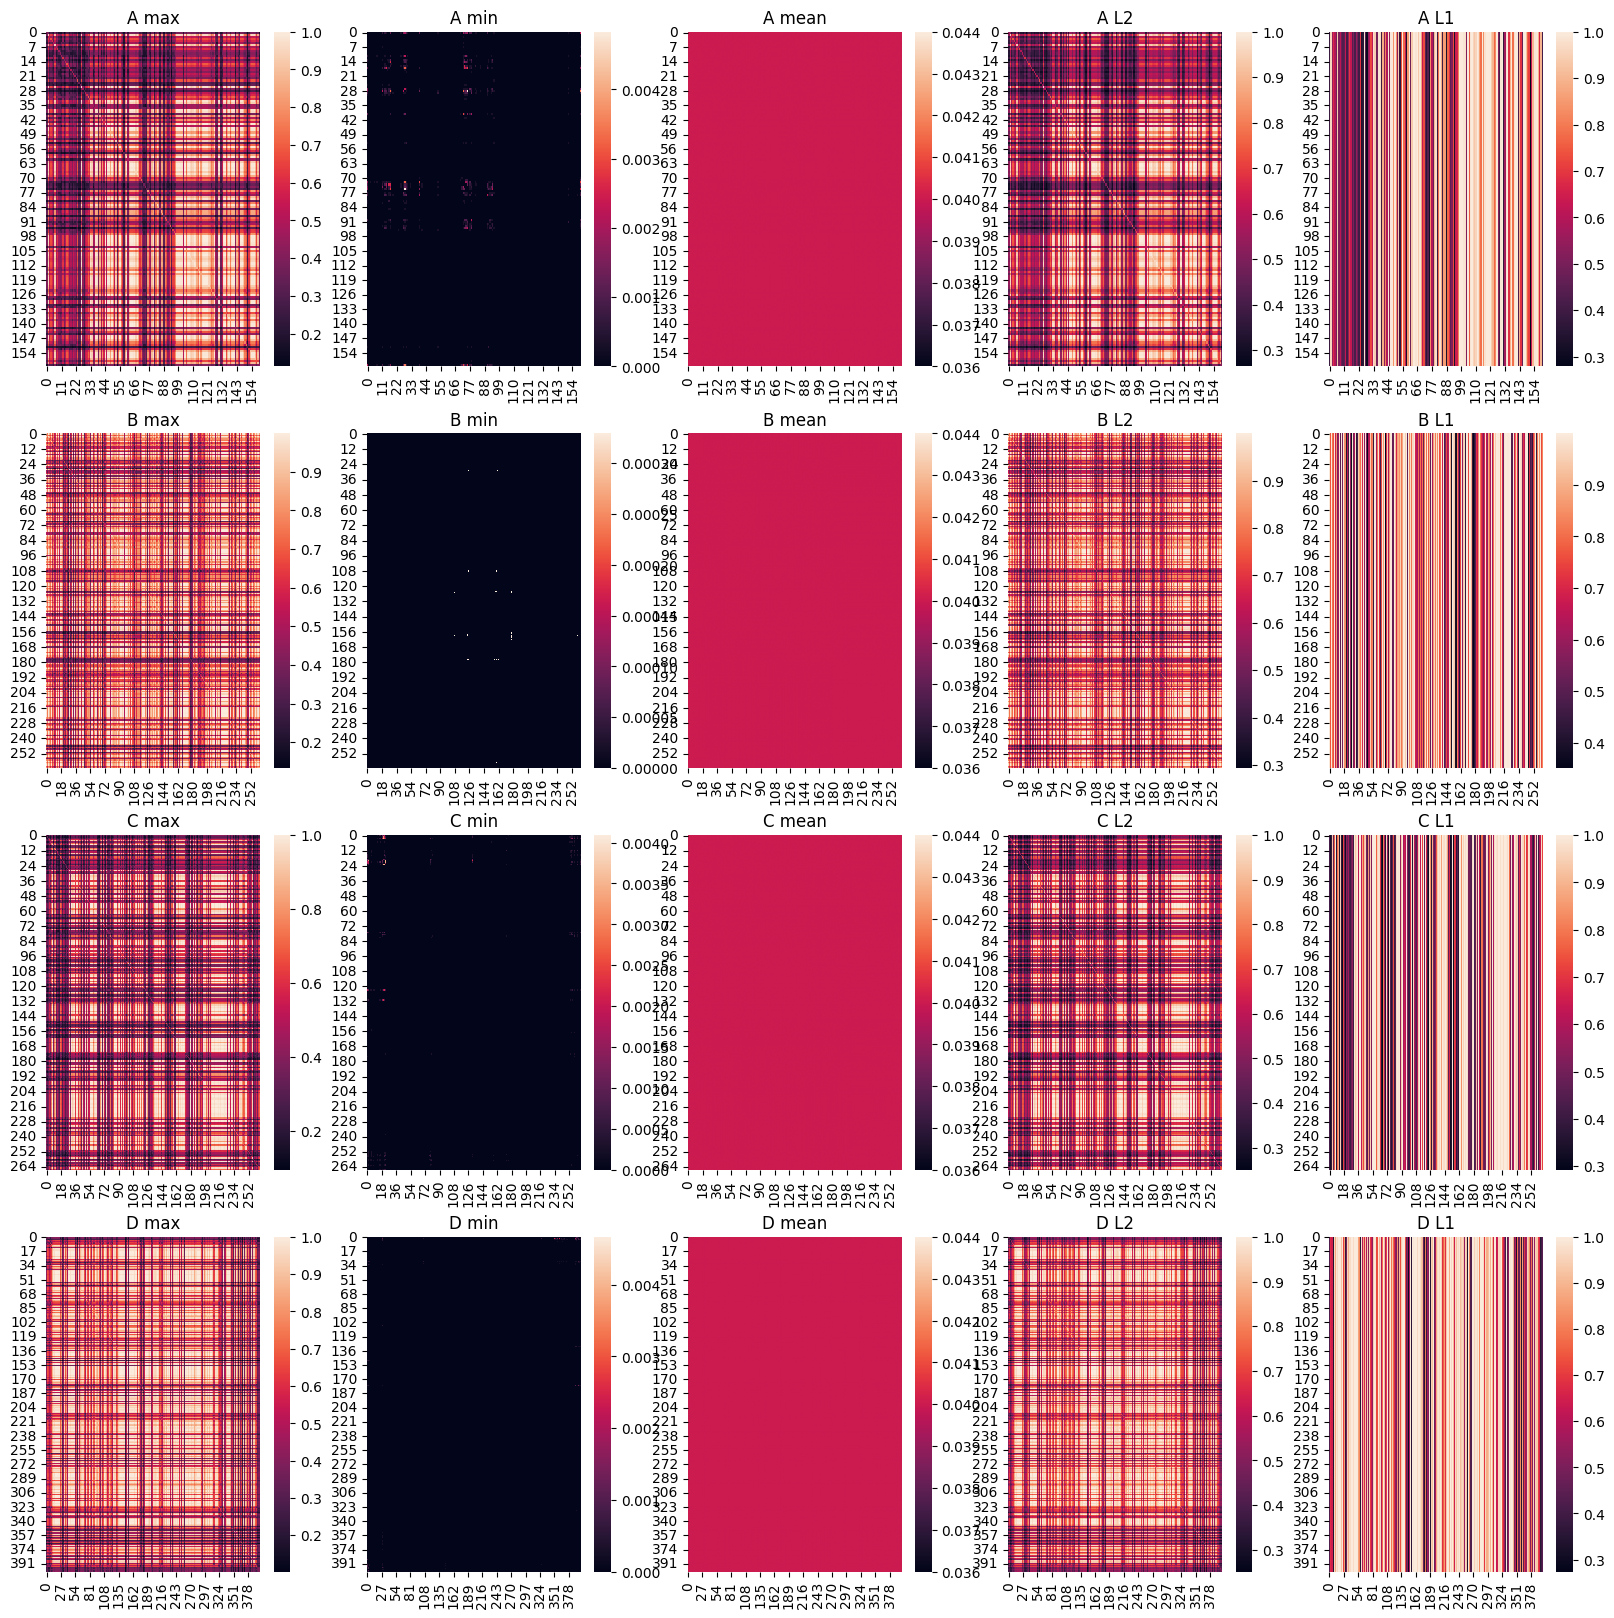

In [17]:
data_sets = ['A_filtered.fasta', 'B_filtered.fasta', 'C_filtered.fasta', 'D_filtered.fasta']
data_sets_name = ['A', 'B', 'C', 'D']
methods = ['max', 'min', 'mean', 'L2', 'L1']
fig,axes = plt.subplots(4,5, figsize=(20,20))

for (i,data_set), name in zip(enumerate(data_sets), data_sets_name):
    seqs  = read_fasta(data_set)
    one_hot = one_hot_tranform(seqs,lett2index=lett2index,N_aa=5)
    one_hot_3d = one_hot.reshape(one_hot.shape[0],-1,5).transpose(0, 2, 1)
    cov = np.tensordot(one_hot_3d.T, one_hot_3d, axes=([2],[0]))/one_hot_3d.shape[0]
    
    for method, ax in zip(methods, axes[i].flatten()):
        if method == 'max':
            cov_max = cov.max(axis=(1,2))
            sns.heatmap(cov_max, ax=ax)
        elif method == 'min':
            cov_min = cov.min(axis=(1,2))
            sns.heatmap(cov_min, ax=ax)
        elif method == 'mean':
            cov_mean = cov.mean(axis=(1,2))
            sns.heatmap(cov_mean, ax=ax)
        elif method == 'L2':
            cov_L2 = np.linalg.norm(cov, axis=(1,2))
            sns.heatmap(cov_L2, ax=ax)
        elif method == 'L1':
            cov_L1 = np.linalg.norm(cov, ord=1, axis=(1,2))
            sns.heatmap(cov_L1, ax=ax)
        ax.set_title(f'{name} {method}')